# Homework 3 (CIFAR-10)

In [8]:
# import analysis packages
import keras
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers import AveragePooling2D, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

### Data Cleaning

In [2]:
# import dataset
(imgTrain, lblTrain), (imgTest, lblTest) = cifar10.load_data()

(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

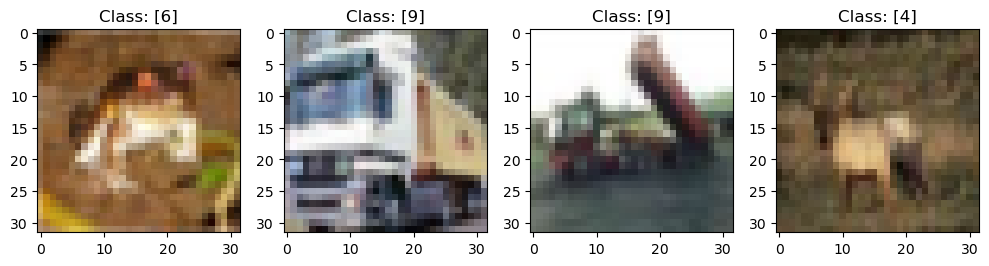

In [3]:
# check dimensions of data
display(imgTrain.shape)
display(lblTrain.shape)
display(imgTest.shape)
display(lblTest.shape)

# plot first few training images
myplot, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
for i in range(4):
    axes[i].imshow(imgTrain[i], cmap=plt.cm.binary)
    axes[i].title.set_text(f"Class: {lblTrain[i]}")
myplot.tight_layout()

In [4]:
# scale image data
imgTrain = imgTrain.astype('float32') / 255
imgTest = imgTest.astype('float32') / 255

# factor categorical response
lblTrain = to_categorical(lblTrain)
lblTest = to_categorical(lblTest)

### Model Fitting

In [20]:
# model fitting and evaluation function
def EvaluateModel(model):
    # set random seed
    np.random.seed(4252023)
    tf.random.set_seed(4252023)

    # compile model
    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    # model summary
    model.summary()

    # number of epochs
    EPOCHS = 50

    # early stopping criteria
    earlyStop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

    # train model
    trained = model.fit(imgTrain, 
                        lblTrain, 
                        epochs = EPOCHS, 
                        batch_size = 64, 
                        validation_split = 0.2,
                        callbacks = earlyStop,
                        verbose = 1)

    # prepare model evaluation
    acc = trained.history['accuracy']
    val_acc = trained.history['val_accuracy']
    loss = trained.history['loss']
    val_loss = trained.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # final validation accuracy
    display(f"Validation accuracy: {round(val_acc[-1] * 100, 2)}%")

    # plot training accuracy
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))
    ax1.plot(epochs, acc, 'bo', label = 'Training acc')
    ax1.plot(epochs, val_acc, 'b', label = 'Validation acc')
    ax1.set(xlabel = 'Epochs', ylabel = 'Accuracy')
    ax1.legend()
    ax2.plot(epochs, loss, 'bo', label = 'Training loss')
    ax2.plot(epochs, val_loss, 'b', label = 'Validation loss')
    ax2.set(xlabel = 'Epochs', ylabel = 'Loss')
    ax2.legend()
    fig.suptitle('Evaluation Metrics')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 7200)              0         
                                                                 
 dense_22 (Dense)            (None, 10)                72010     
                                                                 
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
625/625 [==============================] - 8s 12ms/step - loss: 1.6056 - accuracy: 0.4365 - val_loss: 1.

'Validation accuracy: 63.49%'

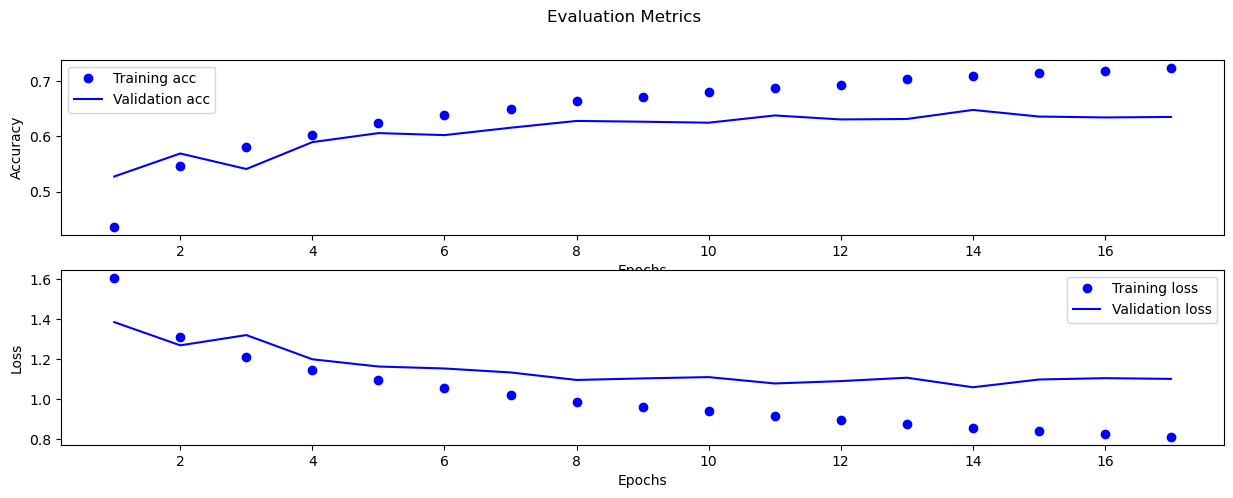

In [21]:
# define model architecture
model = models.Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 flatten_11 (Flatten)        (None, 512)             

'Validation accuracy: 69.55%'

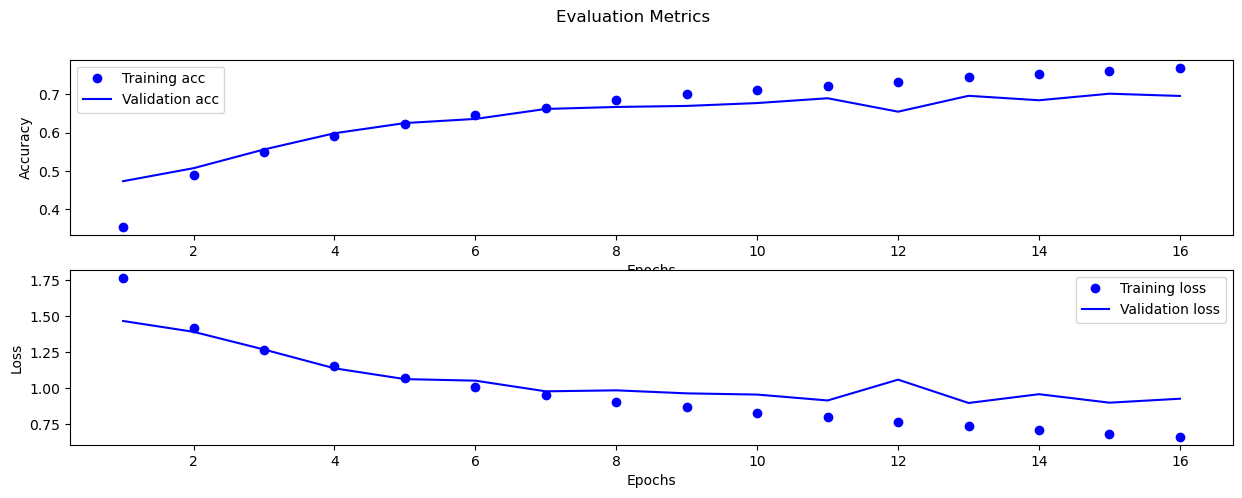

In [22]:
# define model architecture
model = models.Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 32)          36896     
                                                                 
 flatten_12 (Flatten)        (None, 512)             

'Validation accuracy: 71.7%'

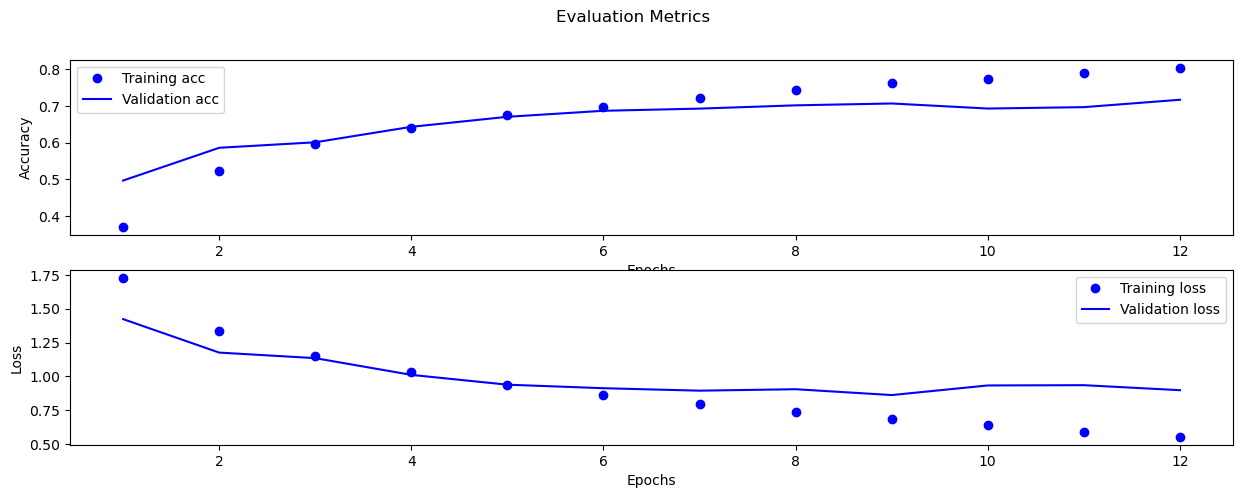

In [23]:
# define model architecture
model = models.Sequential([
    Conv2D(128, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 average_pooling2d_11 (Avera  (None, 14, 14, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_28 (Conv2D)          (None, 10, 10, 32)        25632     
                                                                 
 average_pooling2d_12 (Avera  (None, 5, 5, 32)         0         
 gePooling2D)                                                    
                                                                 
 flatten_13 (Flatten)        (None, 800)               0         
                                                                 
 dense_27 (Dense)            (None, 120)             

'Validation accuracy: 65.58%'

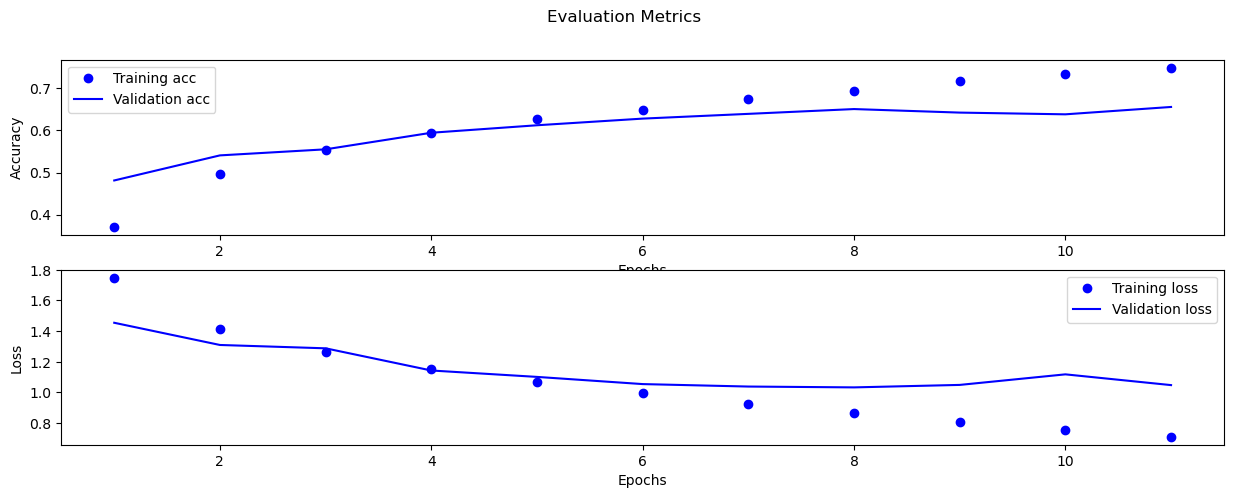

In [24]:
# define model architecture
model = models.Sequential([
    Conv2D(32, (5, 5), activation = 'relu', input_shape = (32, 32, 3)),
    AveragePooling2D((2, 2), 2),
    Conv2D(32, (5, 5), activation = 'relu'),
    AveragePooling2D((2, 2), 2),
    Flatten(),
    Dense(120, activation = 'relu'),
    Dense(84, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 average_pooling2d_13 (Avera  (None, 14, 14, 128)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_30 (Conv2D)          (None, 10, 10, 128)       409728    
                                                                 
 average_pooling2d_14 (Avera  (None, 5, 5, 128)        0         
 gePooling2D)                                                    
                                                                 
 flatten_14 (Flatten)        (None, 3200)              0         
                                                                 
 dense_30 (Dense)            (None, 120)             

'Validation accuracy: 67.94%'

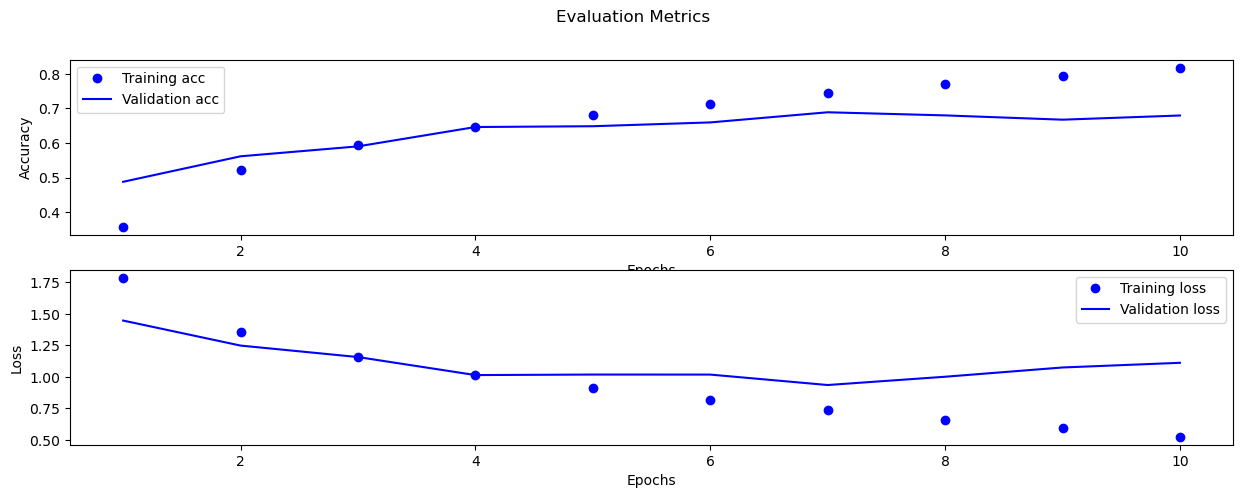

In [25]:
# define model architecture
model = models.Sequential([
    Conv2D(128, (5, 5), activation = 'relu', input_shape = (32, 32, 3)),
    AveragePooling2D((2, 2), 2),
    Conv2D(128, (5, 5), activation = 'relu'),
    AveragePooling2D((2, 2), 2),
    Flatten(),
    Dense(120, activation = 'relu'),
    Dense(84, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)